<a href="https://colab.research.google.com/github/yanamushka/ML-course/blob/main/HW_2_4_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

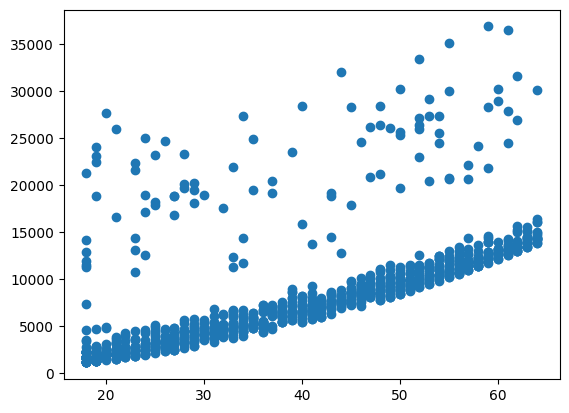

In [2]:
import matplotlib.pyplot as plt
plt.scatter(non_smoker_df.age,non_smoker_df.charges)

In [3]:
X = non_smoker_df.age
Y = non_smoker_df.charges

In [4]:
non_smoker_df.age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [5]:
def normal_equations(X,Y):
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  return theta

In [6]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [7]:
MNK_coefs = normal_equations(X_with_intercept, Y)

Коефіцієнти моделі для МНК:

In [8]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [9]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [10]:
RMSE_MNK = (sum((Y - predictions_MNK)**2)/Y.shape[0])**0.5

In [11]:
RMSE_MNK

4662.505766636393

## Full-Batch градієнтного спуску з numpy

In [12]:
def full_batch_gradient_descent(X, Y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0
    n = len(Y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - Y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors,

m, b, errors = full_batch_gradient_descent(X, Y, lr=0.00001, epochs=1000)
predictions_fbgd = m * X + b

m, b


(220.15455551129122, 0.21300652799863293)

In [13]:
m1, b1, errors1 = full_batch_gradient_descent(X, Y, lr=0.000001, epochs=1000)
m1,b1



(213.4575690658104, 4.33124916239435)

In [14]:
m2, b2, errors2 = full_batch_gradient_descent(X, Y, lr=0.0005, epochs=1000)
m2,b2
predictions_fbgd2 = m2 * X + b2


In [15]:
RMSE_FBGD = (sum((Y - predictions_fbgd)**2)/Y.shape[0])**0.5

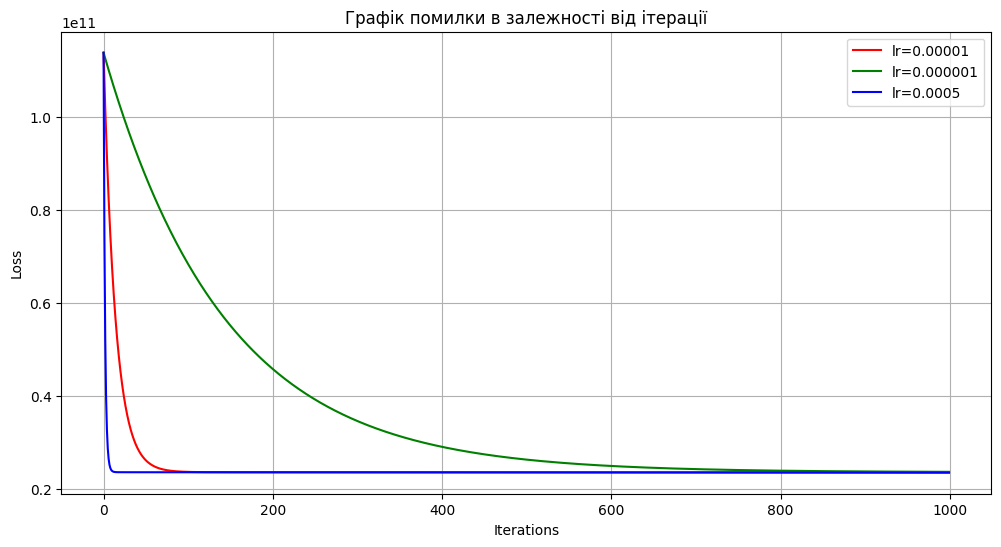

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(errors, color = 'red', label = 'lr=0.00001' )
plt.plot(errors1, color = 'green', label = 'lr=0.000001')
plt.plot(errors2, color = 'blue', label = 'lr=0.0005')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Графік помилки в залежності від ітерації')
plt.grid(True)


За lr = 0.005 функція втрат зменшується найшвидше, тому надалі використаємо значення коефіцієнтів отримані з цим значенням швидкості навчання

## 1.З scikit-learn.LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [18]:
X=X.to_frame()

In [19]:
lin_reg.fit(X, Y)

LinearRegression()

In [20]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [21]:
predictions_sklearn = lin_reg.predict(X)

In [22]:
RMSE_sklearn = (sum((Y - predictions_sklearn)**2)/Y.shape[0])**0.5

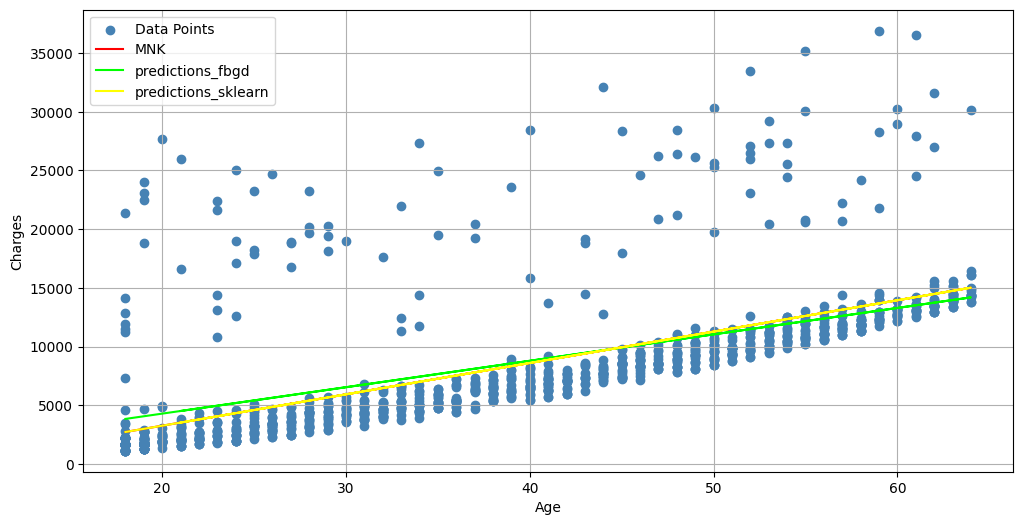

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(X, Y, color = 'steelblue', label = 'Data Points')
plt.plot(X, predictions_MNK, color = 'red', label = 'MNK')
plt.plot(X, predictions_fbgd2, color = 'lime', label = 'predictions_fbgd')
plt.plot(X, predictions_sklearn, color = 'yellow', label = 'predictions_sklearn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print(f"Tочність прогнозу RMSE Методу найменших квадратів:{RMSE_MNK}")
print(f"Tочність прогнозу RMSE Full-Batch градієнтного спуску:{RMSE_FBGD}")
print(f"Tочність прогнозу RMSE scikit-learn:{RMSE_sklearn}")

Tочність прогнозу RMSE Методу найменших квадратів:4662.505766636393
Tочність прогнозу RMSE Full-Batch градієнтного спуску:4715.349750127829
Tочність прогнозу RMSE scikit-learn:4662.505766636391


In [25]:
print(f"Рівняння регресії за Методу найменших квадратів:y={MNK_coefs[0]} + x*{MNK_coefs[1]}")
print(f"Рівняння регресії за Full-Batch градієнтного спуску:y={m2} + x*{b2}")
print(f"Рівняння регресії за використання scikit-learn:y={lin_reg.intercept_} + x*{lin_reg.coef_}")

Рівняння регресії за Методу найменших квадратів:y=-2091.4205565650805 + x*267.2489128311998
Рівняння регресії за Full-Batch градієнтного спуску:y=225.1005806901033 + x*-219.45815699658448
Рівняння регресії за використання scikit-learn:y=-2091.4205565650864 + x*[267.24891283]


## Висновки:
За припущенням у попередніх домашніх завданнях модель мала б виглядати наступним чином у = 200х + 50. Цей варіант є найбільш наближеним до прямої описаної за допомогою методу градієнтного спуску.
За результатом оцінки точності прогнозу RMSE  цей варіант має дещо нижчий показник точності

Рівняння отриимані за допомогою бібліотеки scikit-learn та МНК збігаються так як у scikit-learn використовується МНК.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [44]:
smoker_df = medical_df[medical_df.smoker == 'yes']
Y_smoker = smoker_df.charges
X_smoker = smoker_df.age.to_frame()

In [27]:
lin_reg_smoker = LinearRegression()

In [45]:
lin_reg_smoker.fit(X_smoker, Y_smoker)

LinearRegression()

In [46]:
lin_reg_smoker.coef_, lin_reg_smoker.intercept_

(array([305.23760211]), 20294.128126915966)

In [50]:
predictions_sklearn_smoker = lin_reg_smoker.predict(X_smoker)

In [37]:
predictions_sklearn_smoker.shape

(274,)

In [49]:
from sklearn.metrics import mean_squared_error

In [48]:
RMSE_smoker = mean_squared_error(Y_smoker,predictions_sklearn_smoker,squared=False)
RMSE_smoker

10711.00334810241

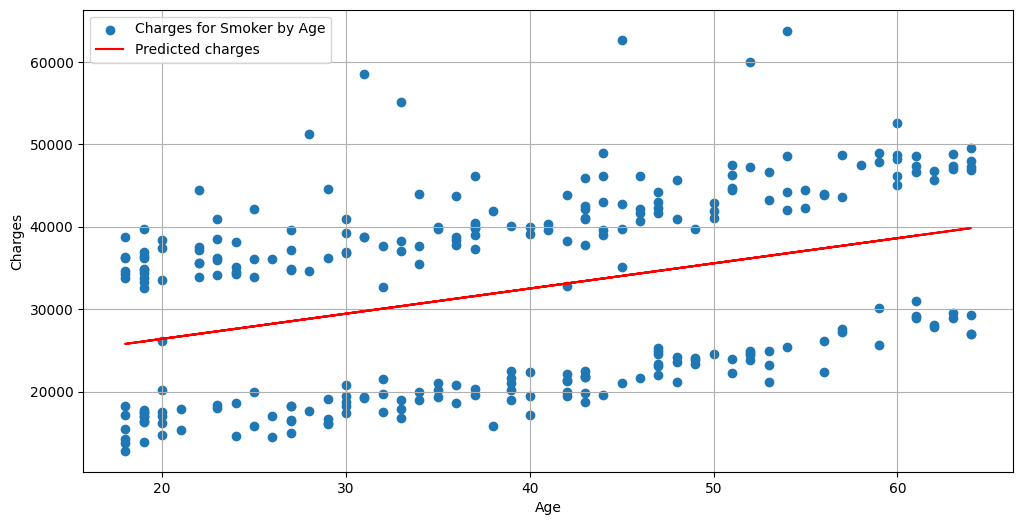

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(X_smoker,Y_smoker, label = 'Charges for Smoker by Age' )
plt.plot(X_smoker,predictions_sklearn_smoker, color = 'red', label = 'Predicted charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
Y_smoker.mean()

32050.23183153284

Як видно з графіка  побудованого з моделі для курців використання такої моделі є неможливим, так як дані не збігаються з експериментальними даними
Разом з тим маємо доволі високий показник RMSE, який складає третину від медіанного значення, що також свідчить про низьку якість цієї моделі.

Ми спостерігаємо розташування експериментальних даних у скупченнях двох прямих, що уже піддіє сумніву наявність лінійної залежності між віком курців та оплатами. Варто дослідити  за якою ознакою ці дані розділяються, та дослідити можливість побудови регресії за декількома ознаками